In [9]:
from  bped2.pedigree import Pedigree
import bped2.view as pview


In [10]:
ped = Pedigree()
ped.gen_ped('multi',3,2,4,2)
ped.get_pedigree()['1']

People(140274194588496 :[multi 1 0 0 1 {'2'}]

In [11]:
dict_name = {'1':'Paul','2':'Jacques','3':'Pierre'}
print(dict_name.keys())
ped.insert_name(dict_name)
# for i in dict_name.keys():
#     print(i)
#     if i in ped.get_pedigree():
#         ped.add_people(ped.get_people(i).famID,dict_name[i],ped.get_people(i).fatID,ped.get_people(i).matID)
#         ped.add_sex(dict_name[i],ped.get_people(i).sex)
#         for c in ped.get_people(i).child:
#             ped.get_people(dict_name[i]).add_children(c)
#             print(ped.get_pedigree())
#         ped.remove_people(i)
print(ped.get_pedigree())

dict_keys(['1', '2', '3'])
{'Paul': People(140274200288912 :[multi Paul 0 0 1 {'Jacques'}], 'Jacques': People(140274200289040 :[multi Jacques 0 0 0 set()], 'Pierre': People(140274198539088 :[multi Pierre 0 0 2 {'Jacques'}]}


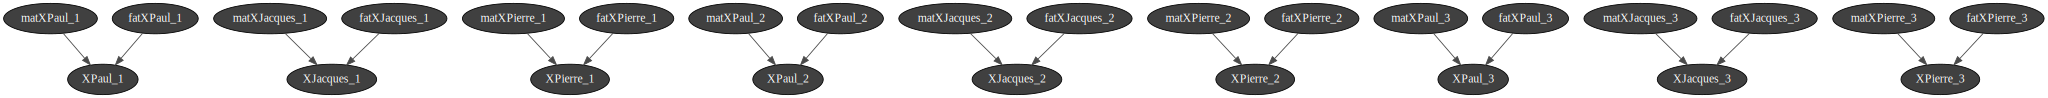

In [12]:
bn = pview.bn_multi_pb(ped, 0.05, 3,[0.8,0.7])
pview.gnb.showBN(bn, size=100)


In [8]:
bn.cpt('Sfat2_1')

NotFound: [pyAgrum] Object not found: hashtable's chained list contains no element with this key <Sfat2_1>

In [6]:
bn.cpt('Sfat2_2')

(gum::Potential<double>@0x5613d94103a0) <Sfat2_2:fat|Sfat2_1:fat> :: 0.2 /<Sfat2_2:mat|Sfat2_1:fat> :: 0.8 /<Sfat2_2:fat|Sfat2_1:mat> :: 0.8 /<Sfat2_2:mat|Sfat2_1:mat> :: 0.2

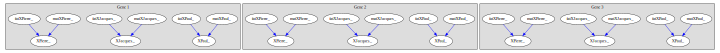

In [13]:
pview.graph_multi(bn,10)

In [4]:
evidence = pview.load_evidence_multi('../data/multi.ev','0')
evidence

0 oooo 0	1_1	0	1	1	1

1 oooo 0	1_2	1	0	0	0

2 oooo 0	1_3	0	1	1	1



{'X1_1': [0.0, 1.0, 1.0, 1.0],
 'X1_2': [1.0, 0.0, 0.0, 0.0],
 'X1_3': [0.0, 1.0, 1.0, 1.0]}

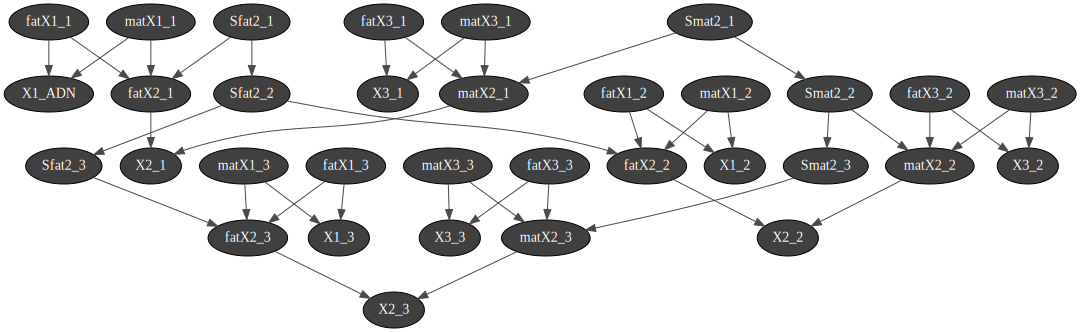

In [4]:
bn.changeVariableName('X1_1','X1_ADN')
pview.gnb.showBN(bn, size=100)


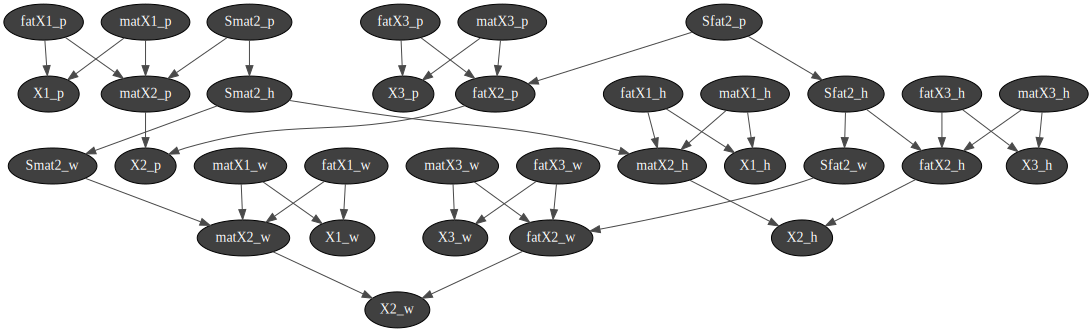

In [5]:
bn = pview.bn_multi_pb(ped, 0.05, 3,[0.8,0.7],['p','h','w'])
pview.gnb.showBN(bn, size=100)

In [ ]:
gene=4
ped = Pedigree()
ped.gen_ped('multi',10000,30,4,2)
ped.get_pedigree()
#bn = pview.ped_to_bn(ped,0.05)
bn = pview.bn_multi_pb(ped, 0.05, 4,[0.8,0.7,0.6])
pview.gnb.showBN(bn, size=100)
ie1 = pview.gum.LoopyBeliefPropagation(bn)
ie1.setEvidence({'X1_1':[1,0,0,0],'X3_3':[1,1,1,0]})
#ie1.setEvidence({'X1':[1,0,0,0],'X3':[1,1,1,0]})
ie1.makeInference()
ie2 = pview.gum.LazyPropagation(bn)
ie2.setEvidence({'X1_1':[1,0,0,0],'X3_3':[1,1,1,0]})
#ie2.setEvidence({'X1':[1,0,0,0],'X3':[1,1,1,0]})
ie2.makeInference()
for j in ped.get_pedigree().keys():
    p1 = print(ie1.posterior(f'X{j}'))
    p2 = print(ie2.posterior(f'X{j}'))
    # for g in range(1,gene+1):
    #     p1 = print(ie1.posterior(f'X{j}_{g}'))
    #     p2 = print(ie2.posterior(f'X{j}_{g}'))